The homework assignment (HW5) studies the statistical properties of a thermostat box with periodic boundary conditions using two methods: **molecular dynamics simulation** and **Monte Carlo method**. This paper uses the virial equation of state to calculate pressure and provides two different approaches: one using Hamiltonian mechanics and the virial theorem, and another using partial derivatives of the Helmholtz free energy. Both Monte Carlo algorithm and molecular dynamics simulation yield consistent results for pressure. The paper also presents an approximate method for calculating chemical potential using the **Widom algorithm** and compares it with the **Overlapping distribution algorithm**.

## Initialize
Dimensionless temperature $T=5$, box length $L = 5$

In [396]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import matplotlib.patches as pch

In [397]:
T=50#total time
h=T/10000#Time interval
t=np.linspace(0,T,10000)
temperature=5

In [398]:
x=np.zeros((27,10000))
y=np.zeros((27,10000))
z=np.zeros((27,10000))
vx=np.zeros((27,10000))
vy=np.zeros((27,10000))
vz=np.zeros((27,10000))
ax=np.zeros((27,10000))
ay=np.zeros((27,10000))
az=np.zeros((27,10000))

In [399]:
location=np.array([[2.5,2.5,2.5],
                 [1.5,2.5,2.5],
                 [3.5,2.5,2.5],
                 [2.5,1.5,2.5],
                 [2.5,3.5,2.5],
                 [2.5,2.5,1.5],
                 [2.5,2.5,3.5],
                 [3.5,3.5,2.5],
                 [3.5,1.5,2.5],
                 [1.5,3.5,2.5],
                 [1.5,1.5,2.5],
                 [3.5,2.5,3.5],
                 [3.5,2.5,1.5],
                 [1.5,2.5,3.5],
                 [1.5,2.5,1.5],
                 [2.5,3.5,3.5],
                 [2.5,3.5,1.5],
                 [2.5,1.5,3.5],
                 [2.5,1.5,1.5],
                 [3.5,3.5,3.5],
                 [3.5,3.5,1.5],
                 [3.5,1.5,3.5],
                 [1.5,3.5,3.5],
                 [1.5,1.5,3.5],
                 [1.5,3.5,1.5],
                 [3.5,1.5,1.5],
                 [1.5,1.5,1.5],])

In [400]:
for i in range(27):
    x[i][0]=location[i][0]
    y[i][0]=location[i][1]
    z[i][0]=location[i][2]

In [401]:
sumvx=0
sumvy=0
sumvz=0
sumkinx=0

In [402]:
origin=np.random.rand(3,27)-0.5

In [403]:
for i in range(27):
    sumvx+=origin[0][i]
    sumvy+=origin[1][i]
    sumvz+=origin[2][i]
    sumkin+=origin[0][i]**2+origin[1][i]**2+origin[2][i]**2
sumvx=sumvx/27
sumvy=sumvy/27
sumvz=sumvz/27
sumkin=sumkin/27

In [404]:
fs=math.sqrt(3*temperature/sumkin)

In [405]:
for i in range(27):
    vx[i][0]=(origin[0][i]-sumvx)*fs
    vy[i][0]=(origin[1][i]-sumvy)*fs
    vz[i][0]=(origin[2][i]-sumvz)*fs
    x[i][0]=x[i][0]-vx[i][0]*h
    y[i][0]=y[i][0]-vy[i][0]*h
    z[i][0]=z[i][0]-vz[i][0]*h

In [406]:
uk=0
for i in range(27):
    uk+=vx[i][0]**2+vy[i][0]**2+vz[i][0]**2
uk=uk/27

In [407]:
uk

13.826819388626335

In [408]:
np.save('./test.npy',(x[:,0],y[:,0],z[:,0],vx[:,0],vy[:,0],vz[:,0]))

In [409]:
L=5#盒长
rc=2.5#截断半径

In [410]:
def compare(xi,xj):#计算最近镜像
    if abs(xi-xj)<=abs(xi-xj+L):
        if abs(xi-xj)<=abs(xi-xj-L):
            px=0
            dx=abs(xi-xj)
        else:
            px=+1
            dx=abs(xi-xj-L)
    else:
        if abs(xi-xj+L)<=abs(xi-xj-L):
            px=-1
            dx=abs(xi-xj+L)
        else:
            px=+1
            dx=abs(xi-xj-L)
    return px,dx

In [411]:
def cal_r(xi,yi,zi,xj,yj,zj):
    px,dx=compare(xi,xj)
    py,dy=compare(yi,yj)
    pz,dz=compare(zi,zj)
    r=math.sqrt(dx*dx+dy*dy+dz*dz)
    return r,px,py,pz#px, py, pz represent the coordinates of the mirror points.    

In [412]:
sigma=math.sqrt(temperature)

In [413]:
import random

## Anderson heat bath
In the heat bath method proposed by Anderson, the system is coupled to a heat bath at a given temperature. This coupling is manifested by the particles in the box experiencing random pulse forces at a certain frequency. The coupling strength $\gamma$ is defined as the frequency at which the particles are subjected to random pulse forces. Assuming no correlation between collisions, each collision is a Markov process. The time between two consecutive collisions follows an exponential distribution $exp(\gamma)$. In the specific implementation of the algorithm, during each time step of the **Velocity-Verlet** algorithm, the velocity of each particle is randomly sampled from $N(0, \tau_{0})$ with a probability of $\gamma \Delta t$.

In [481]:
u=0.001

In [482]:
x=np.zeros((27,10000))
y=np.zeros((27,10000))
z=np.zeros((27,10000))
vx=np.zeros((27,10000))
vy=np.zeros((27,10000))
vz=np.zeros((27,10000))
ax=np.zeros((27,10000))
ay=np.zeros((27,10000))
az=np.zeros((27,10000))

In [483]:
initialization=np.load('./data/50s-1.npy')

In [484]:
(x[:,0],y[:,0],z[:,0],vx[:,0],vy[:,0],vz[:,0])=initialization

In [485]:
vx_temp=np.zeros(27)
vy_temp=np.zeros(27)
vz_temp=np.zeros(27)
for i in range(9999):
    #print(i)

    for j in range(27):
        x[j][i+1]=(x[j][i]+vx[j][i]*h+0.5*h*h*ax[j][i])%L#取模，周期性边条件
        y[j][i+1]=(y[j][i]+vy[j][i]*h+0.5*h*h*ay[j][i])%L
        z[j][i+1]=(z[j][i]+vz[j][i]*h+0.5*h*h*az[j][i])%L
    for j in range(27):
        vx_temp[j]=vx[j][i]+0.5*h*ax[j][i]
        vy_temp[j]=vy[j][i]+0.5*h*ay[j][i]
        vz_temp[j]=vz[j][i]+0.5*h*az[j][i]
        for k in range(27):
            if j==k:
                continue
            rjk,px,py,pz=cal_r(x[j][i+1],y[j][i+1],z[j][i+1],x[k][i+1],y[k][i+1],z[k][i+1])
            if (rjk>rc or rjk==0): 
                continue
            else:
                #print(j,k,rij)
                ax[j][i+1]+=4*(12*math.pow(rjk,-14)-6*math.pow(rjk,-8))*(x[j][i+1]-x[k][i+1]-px*L)
                ay[j][i+1]+=4*(12*math.pow(rjk,-14)-6*math.pow(rjk,-8))*(y[j][i+1]-y[k][i+1]-py*L)
                az[j][i+1]+=4*(12*math.pow(rjk,-14)-6*math.pow(rjk,-8))*(z[j][i+1]-z[k][i+1]-pz*L)
        vx[j][i+1]=vx_temp[j]+0.5*h*ax[j][i+1]
        vy[j][i+1]=vy_temp[j]+0.5*h*ay[j][i+1]
        vz[j][i+1]=vz_temp[j]+0.5*h*az[j][i+1]
        if(random.random()<u):
            v_new=np.random.normal(0,sigma,3)
            vx[j][i+1]=v_new[0]
            vy[j][i+1]=v_new[1]
            vz[j][i+1]=v_new[2]

            

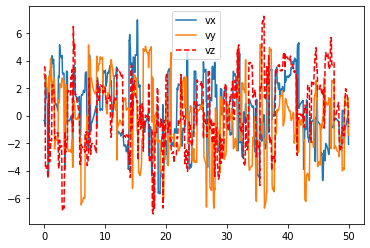

In [486]:
a=plt.plot(t,vx[0],label='vx')
b=plt.plot(t,vy[0],label='vy')
c=plt.plot(t,vz[0],'r--',label='vz')
plt.legend(loc='best')

In [487]:
uk=np.zeros(10000)

In [488]:
for i in range(10000):
    for j in range(27):
        uk[i]+=vx[j][i]*vx[j][i]+vy[j][i]*vy[j][i]+vz[j][i]*vz[j][i]
    uk[i]=uk[i]/54 #动能乘1/2

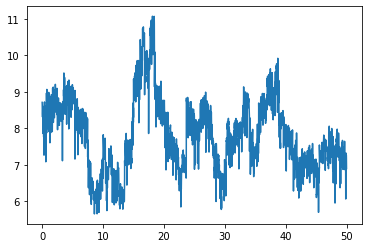

In [489]:
plt.plot(t,uk)

In [476]:
up=np.zeros(10000)

In [477]:
for i in range(9999):
    for j in range(27):
        for k in range(27):
            if j==k:
                continue
            rjk,px,py,pz=cal_r(x[j][i],y[j][i],z[j][i],x[k][i],y[k][i],z[k][i])
            up[i]+=4*(math.pow(rjk,-12)-math.pow(rjk,-6))
    up[i]=up[i]/54 #每个分子平均势能，要乘以1/2因为两个粒子的相互作用势被计算了两次

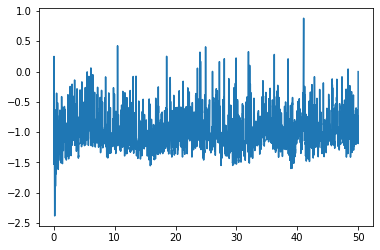

In [478]:
plt.plot(t,up)

C:\ProgramData\Anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error in 3.6
  """


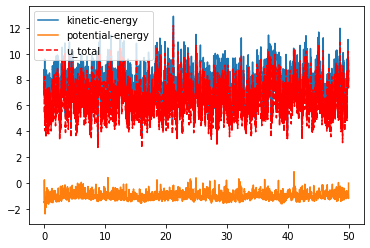

In [479]:
a1=plt.plot(t,uk,label='kinetic-energy')
b1=plt.plot(t,up,label='potential-energy')
c1=plt.plot(t,uk+up,'r--',label='u_total')
plt.legend(loc='best')
plt.savefig('能量变化曲线',figsize=(10,8),dpi=150)

In [144]:
uk_average=0
for i in range(10000):
    uk_average+=uk[i]
uk_average=uk_average/10000

In [145]:
uk_average

7.670460014547066

## velocity-distribution

In [460]:

count=np.zeros(40)
t1=np.linspace(-10,10,40)

In [490]:
num=0
for i in range(0,10000):
    for j in range(27):
        if(((-10)<vx[j][i])and((+10>vx[j][i]))):
            k=int(vx[j][i]*2+19)
            count[k]+=1
            num+=1
count=count/(num/2)

In [491]:
t1.size,count.size

(40, 40)

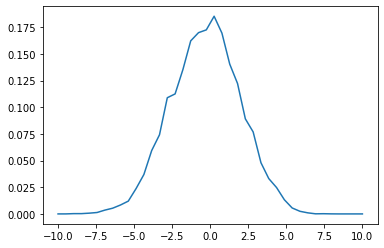

In [492]:
plt.plot(t1,count)

In [270]:
initialization=np.load('./test.npy')

In [271]:
initialization

array([[ 2.50122505,  2.5       ,  2.49877495, ...,  3.67309021,
         3.66884006,  3.66458925],
       [ 2.50021751,  2.5       ,  2.49978249, ...,  1.08921512,
         1.09233017,  1.09544333],
       [ 2.50159097,  2.5       ,  2.49840903, ...,  0.7926169 ,
         0.79198778,  0.79136082],
       [-1.22505313, -1.22505313, -1.22422042, ..., -4.24967933,
        -4.25048022, -4.25102417],
       [-0.21750899, -0.21750899, -0.21762281, ...,  3.11585953,
         3.11410396,  3.11210421],
       [-1.5909734 , -1.5909734 , -1.59072934, ..., -0.63023473,
        -0.62804232, -0.62591285]])

In [459]:
for i in range(27):
    if(random.random()<0.5):
        kkk=np.random.normal(0,sigma,3)
        print(kkk[0],i)

2.34765503888849 1
-0.723559218308853 7
0.9082426507621839 8
-0.4338180093017833 9
0.3001100523681674 18
-3.2870526153774793 19
1.5854901806970372 20
1.296282314059258 21
-1.4579407280658896 22
-4.085333596675137 23


## Pressure
Indeed, directly calculating partial derivatives and maintaining constant entropy are challenging in molecular dynamics simulations. Therefore, it is difficult to compute pressure using the formula $p=-(\frac{\partial U}{\partial V})_{\sigma}$ in molecular simulations. However, we can use the **virial equation of state** to calculate pressure.

From the canonical ensemble's Boltzmann distribution, $ρ(q,p)\propto exp(-\beta H)$, where $H$ is the Hamiltonian of the system. The ensemble average is then given by:
$$
\langle A \rangle = \frac{\int A(q,p)exp(-\beta H)d\omega}{\int exp(-\beta H)d\omega}
$$
Where $dω\equiv dq^{3N} dp^{3N}$ represents the volume element in phase space. <br>
Assuming $x_{i}$ and $x_{j}$ are any two of the 6N generalized coordinates, we can prove in the canonical ensemble that:
$$
<x_{i}  \frac{\partial H}{\partial x_{j}}> = {\delta_{ij}\tau}
$$
Prove:
$$
<x_{i}  \frac{\partial H}{\partial x_{j}}> = \frac{\int x_{i}  \frac{\partial H}{\partial x_{j}}exp(-\beta H)d\omega}{\int exp(-\beta H)d\omega}
$$
$$
\int x_{i}  \frac{\partial H}{\partial x_{j}}exp(-\beta H)d\omega = \int \left [ -\tau x_{i}exp(-\beta H)\right ]_{x_{j2}}^{x_{j1}}d\omega(j) +  \tau \int  \frac{\partial x_{i}}{\partial x_{j}}exp(-\beta H)d\omega
$$
In this equation, $xj1$ and $xj2$ represent the "extremes" of xj. If $xj$ is a position coordinate, it corresponds to the container wall where the system potential energy becomes infinitely large. If $xj$ is a momentum coordinate, it becomes infinitely large itself, resulting in the system's kinetic energy becoming infinitely large. Therefore, the first term on the right side is always zero. ($d\omega(j)$ represents the integration over the generalized coordinates excluding $xj$)<br>
$$
\because \frac{\partial x_{i}}{\partial x_{j}} = \delta_{ij}
$$
$$
\therefore <x_{i}  \frac{\partial H}{\partial x_{j}}> = \frac{\tau \int \delta_{ij}exp(-\beta H)d\omega}{\int exp(-\beta H)d\omega} = \delta_{ij}\tau
$$
Where $\tau$ is the kinetic temperature of the system. <br>

Noticing that this conclusion does not depend on the form of H, if we take $x_{i}=x_{j}=q_{i}$, we immediately obtain:
$$
<q_{i} \dot{p_{i}} > =-\tau
$$
The force on the boundary is:
$$
<\sum_{i} q_{i}F_{i}>_{b} = -P\oint d\vec{S}\cdot \vec{r} = -P\int \nabla \cdot \vec{r}dV = -3PV
$$  
The internal forces within the container are given by:
$$
<\sum_{i} q_{i}\frac{\partial H}{\partial q_{i}}> = <-\sum_{i} q_{i}(\sum_{j\neq i} \frac{\partial u_{ij}}{\partial q_{i}})> = <-\sum_{i=1}^{N} \vec{r_{i}} \cdot \sum_{j\neq i} \nabla_{i}u_{ij} >
$$
Here, $u_{ij}$ represents the potential energy between particles i and j. Please note that in the first two equations, i represents the i-th generalized coordinate, while in the third equation, i represents the i-th particle. Here, $\nabla_{i}=\frac{\partial }{\partial x_{i}} \bm{i} +\frac{\partial }{\partial y_{i}} \bm{j}+ \frac{\partial }{\partial z_{i}} \bm{k}$.
$$
\therefore  \nabla_{i}u_{ij} = \frac{du_{ij}}{dr_{ij}}\cdot \frac{\vec{r_{i}}-\vec{r_{j}}}{r_{ij}}

The internal force can be expressed as:
$$
<\sum_{i=1}^{N}\vec{r_{i}} \cdot\sum_{j\neq i}\frac{du_{ij}}{dr_{ij}}\cdot \frac{\vec{r_{i}}-\vec{r_{j}}}{r_{ij}}>=<\sum_{i<j}\frac{du_{ij}}{dr_{ij}}\frac{1}{r_{ij}}(\vec{r_{i}}\cdot(\vec{r_{i}}-\vec{r_{j}})+\vec{r_{j}}\cdot(\vec{r_{j}}-\vec{r_{i}}))>=<\sum_{i<j}\frac{du_{ij}}{dr_{ij}}r_{ij}>
$$
$$
\therefore -3N\tau = -3PV + <\sum_{i<j}\frac{du_{ij}}{dr_{ij}}r_{ij}>
$$
$$
P = \frac{N\tau}{V} + \frac{1}{3V}<\sum_{i<j}\frac{du_{ij}}{dr_{ij}}r_{ij}>
$$

In [480]:
np.save('./data/50s-1.npy',(x[:,9999],y[:,9999],z[:,9999],vx[:,9999],vy[:,9999],vz[:,9999]))

In [495]:
p=np.zeros(10000)
for i in range(10000):
    for j in range(27):
        for k in range(27):
            if j==k:
                continue
            rjk,px,py,pz=cal_r(x[j][i],y[j][i],z[j][i],x[k][i],y[k][i],z[k][i])
            p[i]+=2*(-12*math.pow(rjk,-12)+6*math.pow(rjk,-6))

In [496]:
N=27
V=L*L*L
p_ex=0
for i in range(10000):
    p_ex+=p[i]
p_ex=p_ex/(30000*V)
p_final=N*temperature/V-p_ex

In [497]:
p_final

1.313694167124971